# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [84]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [108]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [85]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [86]:
df_train.shape

(15223, 52)

In [87]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [88]:
df_test.shape

(14910, 52)

In [89]:
df_test.head(1000)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,0,1,1,5,0,0,0,0,NaN
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,0,1,3,3,14,0,0,0,0,NaN
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,0,1,1,1,5,0,0,0,0,NaN
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,0,1,1,4,0,0,0,0,NaN
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [219]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [8]:
df_train.loc[1:3, 'CHILD_TOTAL']

1    3
2    4
3    1
Name: CHILD_TOTAL, dtype: int64

In [220]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

In [197]:
a = df['AGREEMENT_RK'].unique()
a.size

30133

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [221]:
df[df['sample'] == 'train'].head()


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
14910,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
14911,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
14912,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
14913,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
14914,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [109]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Ученая степень', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Строительство', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Развлечения/Искусство', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'СМИ/Реклама/PR-агенства', 'Недвижимость', 'Наука', 'Туризм', 'Логистика', 'Другие сферы', 'Сборочные производства', 'Управляющая компания', 'Салоны красоты и здоровья', 'Подбор персонала', 'Образование', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Маркетинг', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'Юридические услуги/нотариальные услуги', 'Энергетика', 'Торговля', 'Государственная служба'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [114]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda s: s.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda s: s.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda s: s.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Можно было бы попробовать найти кореляцию значений столбцов друг с другом,что бы попробовать заполнить NaN, но на текущем уровне владения python я этого сдлеть не могу.
1. Сделать копию DF, удалить PREVIOUS_CARD_NUM_UTILIZED, удалить все пропуски dropna()
2. Сделать первый столбец в котором пропуски таргетом, построить модель, которая найдет корреляцию остальных стоблцов с целью, если модель не рандомная, то попробовать заполнить пропуски в исходной таблице и то же остальное сделать по другим столбцам

В результате я просто удалил все пропуски из за катастрофически нехватки времени и опыта работы с Юпитером на питоне.

In [110]:
df.isna().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [113]:
df[
    ['GENDER', 
     'AGE',
     'GEN_TITLE', 
     'PERSONAL_INCOME',
     'MARITAL_STATUS', 
     'GEN_INDUSTRY', 
     'ORG_TP_STATE', 
     'ORG_TP_FCAPITAL', 
     'JOB_DIR', 
     'ORG_TP_STATE', 
     'ORG_TP_FCAPITAL',
     'WORK_TIME',
     'FACT_ADDRESS_PROVINCE']
] 

,GENDER,AGE,GEN_TITLE,PERSONAL_INCOME,MARITAL_STATUS,GEN_INDUSTRY,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,ORG_TP_STATE,ORG_TP_FCAPITAL,WORK_TIME,FACT_ADDRESS_PROVINCE
0,1,30,Специалист,7000,Не состоял в браке,Образование,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Государственная комп./учреж.,Без участия,39.0,Красноярский край
1,1,48,NaN,4100,Состою в браке,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Орловская область
2,0,35,Специалист,40000,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Частная компания,Без участия,Участие в основ. деятельности,Частная компания,Без участия,156.0,Коми
3,0,22,Специалист,20000,Не состоял в браке,Другие сферы,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Государственная комп./учреж.,Без участия,9.0,Читинская область
4,1,27,Специалист,17000,Состою в браке,Образование,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,Государственная комп./учреж.,Без участия,84.0,Хабаровский край
5,0,44,NaN,7000,Состою в браке,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Кировская область
6,1,57,Специалист,10000,Не состоял в браке,Сборочные производства,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Государственная комп./учреж.,Без участия,444.0,Курганская область
7,1,33,Специалист,7500,Разведен(а),Образование,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Государственная комп./учреж.,Без участия,144.0,Томская область
8,1,53,NaN,9000,Состою в браке,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Омская область
9,0,33,Рабочий,4000,Состою в браке,Торговля,Индивидуальный предприниматель,Без участия,Вспомогательный техперсонал,Индивидуальный предприниматель,Без участия,36.0,Оренбургская область


In [430]:
sdf = df[
#        (df.GEN_INDUSTRY == 'Строительство') & 
        (df.GENDER == 0) & 
#        (df.AGE.between(40,50)) & 
#        (df.JOB_DIR == 'Участие в основ. деятельности') &
#        (df.GEN_TITLE == 'Рабочий') &
        (df.FACT_ADDRESS_PROVINCE == 'Адыгея')
]
sdf.loc[:,
        ['GENDER',
         'SOCSTATUS_PENS_FL',
         'AGE',
         'EDUCATION',
         'GEN_TITLE', 
         'JOB_DIR', 
         'PERSONAL_INCOME', 
         'GEN_INDUSTRY',
         'WORK_TIME',
         'FACT_ADDRESS_PROVINCE'] 
       ]

,GENDER,SOCSTATUS_PENS_FL,AGE,EDUCATION,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,GEN_INDUSTRY,WORK_TIME,FACT_ADDRESS_PROVINCE
203,0,1,61,Неполное среднее,NaN,NaN,12000.0,NaN,NaN,Адыгея
245,0,0,24,Неоконченное высшее,Специалист,Участие в основ. деятельности,10000.0,ЧОП/Детективная д-ть,60.0,Адыгея
1444,0,0,56,Высшее,Руководитель высшего звена,Участие в основ. деятельности,16000.0,Металлургия/Промышленность/Машиностроение,156.0,Адыгея
1620,0,0,56,Среднее,Рабочий,Участие в основ. деятельности,7000.0,Коммунальное хоз-во/Дорожные службы,36.0,Адыгея
1954,0,1,64,Среднее,Специалист,Участие в основ. деятельности,9000.0,Сборочные производства,85.0,Адыгея
2411,0,0,50,Среднее,Специалист,Участие в основ. деятельности,12000.0,Сельское хозяйство,48.0,Адыгея
2569,0,0,50,Среднее специальное,Специалист,Участие в основ. деятельности,15000.0,Транспорт,117.0,Адыгея
3430,0,0,22,Среднее специальное,Специалист,Участие в основ. деятельности,15000.0,Торговля,6.0,Адыгея
3555,0,0,47,Два и более высших образования,Специалист,Участие в основ. деятельности,9900.0,Торговля,24.0,Адыгея
4151,0,0,44,Среднее,Специалист,Участие в основ. деятельности,5000.0,Развлечения/Искусство,120.0,Адыгея


Ниже идет задание на катигорийность, итого мне нужно придумать как закодировать самые проблемные регионы (их много и через метод dummy) кодирование приведет к существенному расширению таблици, при этом вроде как существуют умные способы кодирования. Ниже провожу исследование, можно ли регионы по среднему AGE или AGREEMENT_RK закодировать.

In [ ]:
#del df['PREVIOUS_CARD_NUM_UTILIZED'] # этот столбец лучше сразу удалить

In [126]:
df['FACT_ADDRESS_PROVINCE'].unique().size

83

In [144]:
gr1 = df.groupby(['FACT_ADDRESS_PROVINCE'])['AGREEMENT_RK'].mean()
gr1 = gr1.reset_index()
gr1 = gr1.rename(index = int, columns = {'AGREEMENT_RK':'PVALUE'})


In [141]:
ndf = df.copy()
ndf = ndf.dropna()
#ndf['FACT_ADDRESS_PROVINCE'].map(ndf['AGREEMENT_RK'].astype(float))

In [122]:
gr1 = gr1.rename(index = int, columns = {'FACT_ADDRESS_PROVINCE':'FACT_ADDRESS_PROVINCE_I'})

In [548]:
gr2 = ndf.groupby(['GEN_INDUSTRY'])['AGE'].mean()
gr2 = gr2.reset_index()
gr2 = gr2.rename(index = int, columns = {'GEN_INDUSTRY':'CG'})


In [549]:
gr = gr.append(gr2)
gr = gr.reset_index(drop=True)

In [820]:
gr = gr.sort_values(by = ['AGE'])

In [774]:
tdf = df.copy()

for i in range(len(gr1)):
    for j in range(len(tdf)):
        if (tdf.at[tdf.index[j], 'FACT_ADDRESS_PROVINCE'] == gr1.at[gr1.index[i],'FACT_ADDRESS_PROVINCE']):
            tdf.at[j, 'FACT_ADDRESS_PROVINCE_INT'] = gr1.at[gr1.index[i],'AGE'].astype(float)

tdf.sort_values

tdf[(tdf.FACT_ADDRESS_PROVINCE == 'Башкирия')]



In [155]:
def object_convert(_df, _colName, _array, _aName, _aValue = 'PVALUE'):
    
    tdf = _df.copy()
    tdf = tdf.dropna()

    for j in range(len(tdf)):
        tdf.at[tdf.index[j], _colName] = _array[(_array[_colName] == tdf.at[tdf.index[j], _colName])].astype(float)
    
    return array

In [179]:
tdf = df.copy()
tdf = tdf.dropna()

tdf['U_FACT_ADDRESS_PROVINCE'] = tdf.FACT_ADDRESS_PROVINCE.map(tdf.groupby('FACT_ADDRESS_PROVINCE')['AGREEMENT_RK'].mean().apply(np.unique)
                                                              ).astype(float)

#for j in range(len(tdf)):
#    gr0 = gr1[(gr1['FACT_ADDRESS_PROVINCE'] == tdf.at[tdf.index[j], 'FACT_ADDRESS_PROVINCE'])]
#    tdf.at[tdf.index[j], 'FACT_ADDRESS_PROVINCE'] = gr0.PVALUE.astype(float)

#gr1[(gr1['FACT_ADDRESS_PROVINCE'] == 'Адыгея')]


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Следующие данные являются категориальными:

1. EDUCATION                     555 non-null object
2. MARITAL_STATUS                555 non-null object
3. GEN_INDUSTRY                  555 non-null object
4. GEN_TITLE                     555 non-null object
5. ORG_TP_STATE                  555 non-null object
6. ORG_TP_FCAPITAL               555 non-null object
7. JOB_DIR                       555 non-null object
8. FAMILY_INCOME     

9. REG_ADDRESS_PROVINCE          30133 non-null object
10. FACT_ADDRESS_PROVINCE         30133 non-null object
11. POSTAL_ADDRESS_PROVINCE       30133 non-null object
12. TP_PROVINCE                   29543 non-null object

13. REGION_NM 
14. sample

данные поля необходимо закодировать, ниже предложен способ dummy кодирования


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [943]:
dtst = df.copy()
dtst = dtst.reset_index(drop = True)

for i in dtst['EDUCATION'].unique():
    print(i)
    print(dtst['EDUCATION'] + '=' + i)

Среднее специальное
0        Среднее специальное=Среднее специальное
1                    Среднее=Среднее специальное
2                    Среднее=Среднее специальное
3                    Среднее=Среднее специальное
4                     Высшее=Среднее специальное
5        Среднее специальное=Среднее специальное
6                    Среднее=Среднее специальное
7        Среднее специальное=Среднее специальное
8        Среднее специальное=Среднее специальное
9           Неполное среднее=Среднее специальное
10                   Среднее=Среднее специальное
11       Среднее специальное=Среднее специальное
12          Неполное среднее=Среднее специальное
13                    Высшее=Среднее специальное
14                   Среднее=Среднее специальное
15                   Среднее=Среднее специальное
16       Среднее специальное=Среднее специальное
17          Неполное среднее=Среднее специальное
18          Неполное среднее=Среднее специальное
19       Среднее специальное=Среднее специальное


In [209]:
dtst = df.copy()
dtst = dtst.dropna()
dtst = dtst.reset_index(drop = True)
se = dtst.copy()

dtst['U_EDUCATION'] = dtst.EDUCATION.map(dtst.groupby('EDUCATION')['AGREEMENT_RK'].mean().apply(np.unique)
                                                                      ).astype(float)  


In [334]:
# функция перекодирования с привязкой к АГРИМЕНТ_РК
def preData(_dIn):
    
    dOut = _dIn.copy()
    # сбрасываю все NaN и переиндексирую
    del dOut['PREVIOUS_CARD_NUM_UTILIZED']
    
    dOut = dOut.dropna()
    
    # исправляем проблемные столбцы
    dOut['PERSONAL_INCOME'] = dOut['PERSONAL_INCOME'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['CREDIT'] = dOut['CREDIT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['FST_PAYMENT'] = dOut['FST_PAYMENT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['LOAN_AVG_DLQ_AMT'] = dOut['LOAN_AVG_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['LOAN_MAX_DLQ_AMT'] = dOut['LOAN_MAX_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')

    
#    dOut['U_TP_PROVINCE'] = dOut.TP_PROVINCE.map(dOut.groupby('FACT_ADDRESS_PROVINCE')['AGREEMENT_RK'].mean().apply(np.unique)
#                                                                      ).astype(float)       
    
#    dOut['U_POSTAL_ADDRESS_PROVINCE'] = dOut.POSTAL_ADDRESS_PROVINCE.map(dOut.groupby('FACT_ADDRESS_PROVINCE')['AGREEMENT_RK'].mean().apply(np.unique)
#                                                                      ).astype(float)       
    
#    dOut['U_REG_ADDRESS_PROVINCE'] = dOut.REG_ADDRESS_PROVINCE.map(dOut.groupby('FACT_ADDRESS_PROVINCE')['AGREEMENT_RK'].mean().apply(np.unique)
#                                                                      ).astype(float)   
    
    
#    dOut['U_FACT_ADDRESS_PROVINCE'] = dOut.FACT_ADDRESS_PROVINCE.map(dOut.groupby('FACT_ADDRESS_PROVINCE')['AGREEMENT_RK'].mean().apply(np.unique)
#                                                                      ).astype(float)

    # перекодирование REG_ADDRESS_PROVINCE
    _count = 0
    for i in dOut['REG_ADDRESS_PROVINCE'].unique():
        dOut['REG_ADDRESS_PROVINCE' + ' = ' + str(_count)] = (dOut['REG_ADDRESS_PROVINCE'] == i).astype(float)
        _count += 1

    # перекодирование FACT_ADDRESS_PROVINCE
    _count = 0
    for i in dOut['FACT_ADDRESS_PROVINCE'].unique():
        dOut['FACT_ADDRESS_PROVINCE' + ' = ' + str(_count)] = (dOut['FACT_ADDRESS_PROVINCE'] == i).astype(float)
        _count += 1

    # перекодирование POSTAL_ADDRESS_PROVINCE
    _count = 0
    for i in dOut['POSTAL_ADDRESS_PROVINCE'].unique():
        dOut['POSTAL_ADDRESS_PROVINCE' + ' = ' + str(_count)] = (dOut['POSTAL_ADDRESS_PROVINCE'] == i).astype(float)
        _count += 1

    # перекодирование TP_PROVINCE
    _count = 0
    for i in dOut['TP_PROVINCE'].unique():
        dOut['TP_PROVINCE' + ' = ' + str(_count)] = (dOut['TP_PROVINCE'] == i).astype(float)
        _count += 1

    # перекодирование EDUCATION
    _count = 0
    for i in dOut['EDUCATION'].unique():
        dOut['EDUCATION' + ' = ' + str(_count)] = (dOut['EDUCATION'] == i).astype(float)
        _count += 1

    # перекодирование MARITAL_STATUS
    _count = 0
    for i in dOut['MARITAL_STATUS'].unique():
        dOut['MARITAL_STATUS' + ' = ' + str(_count)] = (dOut['MARITAL_STATUS'] == i).astype(float)
        _count += 1
    
    # перекодирование GEN_INDUSTRY
    _count = 0
    for i in dOut['GEN_INDUSTRY'].unique():
        dOut['GEN_INDUSTRY' + ' = ' + str(_count)] = (dOut['GEN_INDUSTRY'] == i).astype(float)
        _count += 1
    
    # перекодирование GEN_TITLE
    _count = 0
    for i in dOut['GEN_TITLE'].unique():
        dOut['GEN_TITLE' + ' = ' + str(_count)] = (dOut['GEN_TITLE'] == i).astype(float)
        _count += 1

    # перекодирование ORG_TP_STATE
    _count = 0
    for i in dOut['ORG_TP_STATE'].unique():
        dOut['ORG_TP_STATE' + ' = ' + str(_count)] = (dOut['ORG_TP_STATE'] == i).astype(float)
        _count += 1
    
    
    # перекодирование ORG_TP_FCAPITAL
    _count = 0
    for i in dOut['ORG_TP_FCAPITAL'].unique():
        dOut['ORG_TP_STATE' + ' = ' + str(_count)] = (dOut['ORG_TP_FCAPITAL'] == i).astype(float)
        _count += 1
    
    # перекодирование JOB_DIR
    _count = 0
    for i in dOut['JOB_DIR'].unique():
        dOut['JOB_DIR' + ' = ' + str(_count)] = (dOut['JOB_DIR'] == i).astype(float)
        _count += 1

    
    # перекодирование FAMILY_INCOME
    _count = 0
    for i in dOut['FAMILY_INCOME'].unique():
        dOut['FAMILY_INCOME' + ' = ' + str(_count)] = (dOut['FAMILY_INCOME'] == i).astype(float)
        _count += 1
        
    # перекодирование REGION_NM
    _count = 0
    for i in dOut['REGION_NM'].unique():
        dOut['REGION_NM' + ' = ' + str(_count)] = (dOut['REGION_NM'] == i).astype(float)
        _count += 1
    
    
    for i in dOut.columns: # перебираем все столбцы
        if (str(dOut[i].dtype) == 'object') & (i != 'sample'): # если тип столбца - object
                del dOut[i]
#            for j in set(_dIn[i]): # перекодирование object
#                _dIn[_dIn[j] + ' = ' + i] = ((_dIn[j] == j).astype(float))
   
    # переиндексирую
    del dOut['AGREEMENT_RK']
    dOut = dOut.reset_index(drop = True)
    
    return dOut

In [335]:
dff = preData(df)

In [336]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26840 entries, 0 to 26839
Columns: 440 entries, TARGET to REGION_NM = 10
dtypes: float64(408), int64(31), object(1)
memory usage: 90.1+ MB


In [312]:
dff[
    [
        'FACT_ADDRESS_PROVINCE',
        'U_FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'U_POSTAL_ADDRESS_PROVINCE'
    ]
]

SyntaxError: invalid syntax (<ipython-input-312-5f5ff033313e>, line 8)

In [ ]:
dff = df.copy()
del dff['PREVIOUS_CARD_NUM_UTILIZED']
dff = dff.dropna()

In [283]:

dff.groupby('FAMILY_INCOME')['AGREEMENT_RK'].mean()

FAMILY_INCOME
до 5000 руб.              6.457598e+07
от 10000 до 20000 руб.    6.545563e+07
от 20000 до 50000 руб.    6.529900e+07
от 5000 до 10000 руб.     6.580348e+07
свыше 50000 руб.          6.524972e+07
Name: AGREEMENT_RK, dtype: float64

In [269]:
df[(df.FAMILY_INCOME == 'от 5000 до 10000 руб.')]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test
12,59912574,0,59,0,1,1,0,0,Неполное среднее,Не состоял в браке,...,0,2,2,6,0,0,0,0,NaN,test
16,59912731,0,55,1,0,1,0,0,Среднее специальное,Не состоял в браке,...,1,1,1,5,0,0,0,0,NaN,test
20,59913432,0,65,0,1,1,2,0,Среднее специальное,Разведен(а),...,0,1,1,6,0,0,0,0,NaN,test
29,59914336,0,23,1,0,0,0,0,Неоконченное высшее,Не состоял в браке,...,1,1,1,3,0,0,0,0,NaN,test
30,59914517,0,63,0,1,1,2,0,Среднее специальное,Не состоял в браке,...,0,1,1,3,0,0,0,0,NaN,test
36,59914917,0,56,1,0,0,0,0,Неоконченное высшее,Не состоял в браке,...,1,1,1,4,0,0,0,0,NaN,test
48,59916070,0,49,1,0,1,1,0,Среднее,Вдовец/Вдова,...,1,1,1,5,0,0,0,0,NaN,test
65,59918919,0,55,1,0,1,0,0,Среднее специальное,Не состоял в браке,...,1,1,1,5,0,0,0,0,NaN,test
82,59921307,0,53,1,0,1,2,0,Среднее,Вдовец/Вдова,...,1,1,1,4,0,0,0,0,NaN,test


In [379]:
# функция перекодирования по методу dummy
def preproc_data(_dIn):

    dOut = _dIn.copy()
    # сбрасываю все NaN и переиндексирую
    del dOut['PREVIOUS_CARD_NUM_UTILIZED']
    del dOut['AGREEMENT_RK']
    del dOut['DL_DOCUMENT_FL']
    dOut = dOut.dropna()
    
    # исправляем проблемные столбцы
    dOut['PERSONAL_INCOME'] = dOut['PERSONAL_INCOME'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['CREDIT'] = dOut['CREDIT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['FST_PAYMENT'] = dOut['FST_PAYMENT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['LOAN_AVG_DLQ_AMT'] = dOut['LOAN_AVG_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')
    dOut['LOAN_MAX_DLQ_AMT'] = dOut['LOAN_MAX_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')

    
    # перекодирование EDUCATION
    for i in dOut['EDUCATION'].unique():
        dOut['EDUCATION' + ' = ' + i] = (dOut['EDUCATION'] == i).astype(float)

    del dOut['EDUCATION']

    # перекодирование MARITAL_STATUS
    for i in dOut['MARITAL_STATUS'].unique():
        dOut['MARITAL_STATUS' + ' = ' + i] = (dOut['MARITAL_STATUS'] == i).astype(float)    

    del dOut['MARITAL_STATUS']
    
    # перекодирование GEN_INDUSTRY
    for i in dOut['GEN_INDUSTRY'].unique():
        dOut['GEN_INDUSTRY' + ' = ' + i] = (dOut['GEN_INDUSTRY'] == i).astype(float)    

    del dOut['GEN_INDUSTRY']

    # перекодирование GEN_TITLE
    for i in dOut['GEN_TITLE'].unique():
        dOut['GEN_TITLE' + ' = ' + i] = (dOut['GEN_TITLE'] == i).astype(float)    

    del dOut['GEN_TITLE']
  
    # перекодирование ORG_TP_STATE
    for i in dOut['ORG_TP_STATE'].unique():
        dOut['ORG_TP_STATE' + ' = ' + i] = (dOut['ORG_TP_STATE'] == i).astype(float)    

    del dOut['ORG_TP_STATE']
   
    # перекодирование ORG_TP_FCAPITAL
    for i in dOut['ORG_TP_FCAPITAL'].unique():
        dOut['ORG_TP_STATE' + ' = ' + i] = (dOut['ORG_TP_FCAPITAL'] == i).astype(float)    

    del dOut['ORG_TP_FCAPITAL']
  
    # перекодирование JOB_DIR
    for i in dOut['JOB_DIR'].unique():
        dOut['JOB_DIR' + ' = ' + i] = (dOut['JOB_DIR'] == i).astype(float)    

    del dOut['JOB_DIR']
  
    # перекодирование FAMILY_INCOME
    for i in dOut['FAMILY_INCOME'].unique():
        dOut['FAMILY_INCOME' + ' = ' + i] = (dOut['FAMILY_INCOME'] == i).astype(float)    

    del dOut['FAMILY_INCOME']
  
    # перекодирование REG_ADDRESS_PROVINCE
    for i in dOut['REG_ADDRESS_PROVINCE'].unique():
        dOut['REG_ADDRESS_PROVINCE' + ' = ' + i] = (dOut['REG_ADDRESS_PROVINCE'] == i).astype(float)    

    del dOut['REG_ADDRESS_PROVINCE']

    # перекодирование FACT_ADDRESS_PROVINCE
    for i in dOut['FACT_ADDRESS_PROVINCE'].unique():
        dOut['FACT_ADDRESS_PROVINCE' + ' = ' + i] = (dOut['FACT_ADDRESS_PROVINCE'] == i).astype(float)    

    del dOut['FACT_ADDRESS_PROVINCE']
  
    # перекодирование POSTAL_ADDRESS_PROVINCE
    for i in dOut['POSTAL_ADDRESS_PROVINCE'].unique():
        dOut['POSTAL_ADDRESS_PROVINCE' + ' = ' + i] = (dOut['POSTAL_ADDRESS_PROVINCE'] == i).astype(float)    

    del dOut['POSTAL_ADDRESS_PROVINCE']
   
    # перекодирование TP_PROVINCE
    for i in dOut['TP_PROVINCE'].unique():
        dOut['TP_PROVINCE' + ' = ' + i] = (dOut['TP_PROVINCE'] == i).astype(float)    

    del dOut['TP_PROVINCE']
   
    # перекодирование REGION_NM
    for i in dOut['REGION_NM'].unique():
        dOut['REGION_NM' + ' = ' + i] = (dOut['REGION_NM'] == i).astype(float)    

    del dOut['REGION_NM']
    
    
    # переиндексирую
    dOut = dOut.reset_index(drop = True)
    
    return dOut

Кодирование региона через среднее по AGE не очень удачная идея. Попробую все закодировать через dummy

In [20]:
def ppreproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    return df_output

Или кодирование через АГРИМЕНТ_РК

In [378]:
ndf.dropna()
ndf.corr()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,...,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,PREVIOUS_CARD_NUM_UTILIZED
AGREEMENT_RK,1.000000,0.006183,-0.021908,-0.011135,0.014151,0.042110,0.004972,0.017962,0.006287,-0.036000,...,0.000018,0.007808,-0.039388,-0.010903,0.323576,0.301865,0.283715,0.015624,0.009433,0.099690
TARGET,0.006183,1.000000,-0.099531,0.084637,-0.086877,-0.022527,0.005131,0.054339,-0.042518,-0.004053,...,-0.002757,-0.034542,0.002693,0.085088,-0.021647,-0.053871,-0.020107,0.054491,0.076208,-0.057639
AGE,-0.021908,-0.099531,1.000000,-0.453050,0.557366,0.137661,0.201650,-0.292471,0.228178,0.143122,...,-0.005362,0.094690,-0.012580,-0.450951,0.025198,-0.000848,0.034832,-0.010398,-0.043413,-0.068288
SOCSTATUS_WORK_FL,-0.011135,0.084637,-0.453050,1.000000,-0.805512,-0.094700,-0.049460,0.201723,-0.098187,-0.055358,...,0.000113,0.000707,0.026257,0.995171,0.034138,0.041351,0.030191,0.010670,0.019926,0.025788
SOCSTATUS_PENS_FL,0.014151,-0.086877,0.557366,-0.805512,1.000000,0.122863,0.064727,-0.249495,0.113547,0.068256,...,-0.000449,0.022759,-0.021531,-0.801606,-0.005397,-0.018801,0.001549,-0.003800,-0.017924,-0.035436
GENDER,0.042110,-0.022527,0.137661,-0.094700,0.122863,1.000000,0.049713,-0.076494,0.073968,0.035014,...,0.005086,0.029874,0.003631,-0.093927,0.010806,0.013912,0.023984,0.013686,0.011527,-0.002194
CHILD_TOTAL,0.004972,0.005131,0.201650,-0.049460,0.064727,0.049713,1.000000,0.513394,0.071186,0.049019,...,-0.006214,-0.011168,-0.024506,-0.049297,0.039200,0.008112,0.040559,0.019575,0.009589,-0.040090
DEPENDANTS,0.017962,0.054339,-0.292471,0.201723,-0.249495,-0.076494,0.513394,1.000000,-0.041421,-0.021666,...,-0.005578,-0.045789,-0.016987,0.200719,0.065705,0.051847,0.059872,0.021818,0.026121,-0.005155
REG_FACT_FL,0.006287,-0.042518,0.228178,-0.098187,0.113547,0.073968,0.071186,-0.041421,1.000000,0.518722,...,0.003499,0.064879,-0.034702,-0.097731,0.019136,0.010572,0.022728,-0.005847,-0.017524,-0.068689
FACT_POST_FL,-0.036000,-0.004053,0.143122,-0.055358,0.068256,0.035014,0.049019,-0.021666,0.518722,1.000000,...,0.001848,0.035123,-0.032363,-0.054969,-0.044650,-0.048837,-0.039436,-0.016153,-0.017610,-0.055410


In [578]:
ndf = df.copy()
df_preproc = ndf.pipe(preData)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


In [572]:
def pPipe(_ndf):
    
    ndf = _ndf.copy()
        
    ndf = ndf.drop(['PREVIOUS_CARD_NUM_UTILIZED', 'AGREEMENT_RK', 'DL_DOCUMENT_FL'], axis = 1)

    ndf.loc[ndf['WORK_TIME'].isnull(), 'WORK_TIME'] = ndf['WORK_TIME'].median()
    ndf = ndf.dropna()

    # исправляем проблемные столбцы
    ndf['PERSONAL_INCOME'] = ndf['PERSONAL_INCOME'].map(lambda s: s.replace(',', '.')).astype('float')
    ndf['CREDIT'] = ndf['CREDIT'].map(lambda s: s.replace(',', '.')).astype('float')
    ndf['FST_PAYMENT'] = ndf['FST_PAYMENT'].map(lambda s: s.replace(',', '.')).astype('float')
    ndf['LOAN_AVG_DLQ_AMT'] = ndf['LOAN_AVG_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')
    ndf['LOAN_MAX_DLQ_AMT'] = ndf['LOAN_MAX_DLQ_AMT'].map(lambda s: s.replace(',', '.')).astype('float')


    # Закодируем пол и порт посадки с помощью OneHotEncoding
    ndf = pd.get_dummies(ndf, columns=['EDUCATION', 
                                       'MARITAL_STATUS',
                                       'GEN_INDUSTRY',
                                       'GEN_TITLE',
                                       'ORG_TP_STATE',
                                       'ORG_TP_FCAPITAL',
                                       'JOB_DIR',
                                       'FAMILY_INCOME',
                                       'REG_ADDRESS_PROVINCE',
                                       'FACT_ADDRESS_PROVINCE',
                                       'POSTAL_ADDRESS_PROVINCE',
                                       'TP_PROVINCE',
                                       'REGION_NM'
                                      ])


#    ndf = ndf.reset_index(drop = True)

    return ndf


In [599]:
#ndf = df.copy()
#ndf = pPipe(df)

#df_preproc = ndf.pipe(pPipe)

#df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
#df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [544]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 442 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(30), object(1), uint8(405)
memory usage: 20.1+ MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [57]:
#X, y = df_train_preproc.iloc[:, 1:], df_train_preproc.iloc[:, 0]
#X_test, y_test = df_test_preproc.iloc[:, 1:], df_test_preproc.iloc[:, 0]

#### Задание 5. Обучение и оценка качества разных моделей

In [579]:
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

y = df_train_preproc['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

## Your Code Here

#from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()                     # инициализируем модель
lmodel.fit(X_train, y_train)                      # обучаем модель
lpredict = model.predict(X_test)                  # делаем предсказание

lpredict_proba = lmodel.predict_proba(X_test)


In [580]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

print('precision', precision_score(y_test, lpredict))
print('recall', recall_score(y_test, lpredict))
print('accuracy', accuracy_score(y_test, lpredict))
print('f1', f1_score(y_test, lpredict))

precision 0.6
recall 0.0056179775280898875
accuracy 0.8809736489504243
f1 0.011131725417439703


In [581]:
sdf = pd.DataFrame({
    'model': ['LogisticRegression'], 
    'precision': [precision_score(y_test, lpredict)],
    'recall': [recall_score(y_test, lpredict)],
    'accuracy': [accuracy_score(y_test, lpredict)],
    'f1': [f1_score(y_test, lpredict)]
})

In [582]:
sdf


,model,precision,recall,accuracy,f1
0,LogisticRegression,0.6,0.005618,0.880974,0.011132


In [600]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier()
rmodel.fit(X_train, y_train)
rpredict = model.predict(X_test)

rpredict_proba = rmodel.predict_proba(X_test)

print('precision', precision_score(y_test, rpredict))
print('recall', recall_score(y_test, rpredict))
print('accuracy', accuracy_score(y_test, rpredict))
print('f1', f1_score(y_test, rpredict))


precision 0.6
recall 0.0056179775280898875
accuracy 0.8809736489504243
f1 0.011131725417439703


In [584]:
sdf = sdf.append(
    pd.DataFrame({
        'model': ['RandomForestClassifier'], 
        'precision': [precision_score(y_test, rpredict)],
        'recall': [recall_score(y_test, rpredict)],
        'accuracy': [accuracy_score(y_test, rpredict)],
        'f1': [f1_score(y_test, rpredict)]
    })    
)
#sdf = sdf.reset_index()

In [585]:
sdf

,model,precision,recall,accuracy,f1
0,LogisticRegression,0.6,0.005618,0.880974,0.011132
0,RandomForestClassifier,0.6,0.005618,0.880974,0.011132


In [586]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

In [602]:
y = df_train_preproc['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

tree = DecisionTreeClassifier() #random_state=123
tree.fit(X_train, y_train)

tpredict = tree.predict(X_test)

tpredict_proba = tree.predict_proba(X_test)


In [588]:
print('precision', precision_score(y_test, tpredict))
print('recall', recall_score(y_test, tpredict))
print('accuracy', accuracy_score(y_test, tpredict))
print('f1', f1_score(y_test, tpredict))

precision 1.0
recall 1.0
accuracy 1.0
f1 1.0


In [589]:
sdf = sdf.append(
    pd.DataFrame({
        'model': ['DecisionTreeClassifier'], 
        'precision': [precision_score(y_test, predict)],
        'recall': [recall_score(y_test, predict)],
        'accuracy': [accuracy_score(y_test, predict)],
        'f1': [f1_score(y_test, predict)]
    })    
)


In [590]:
sdf.reset_index(drop = True)

,model,precision,recall,accuracy,f1
0,LogisticRegression,0.6,0.005618,0.880974,0.011132
1,RandomForestClassifier,0.6,0.005618,0.880974,0.011132
2,DecisionTreeClassifier,1.0,1.000000,1.000000,1.000000


In [591]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

In [592]:
import matplotlib.pyplot as plt
%matplotlib inline

In [593]:
sdf

,model,precision,recall,accuracy,f1
0,LogisticRegression,0.6,0.005618,0.880974,0.011132
0,RandomForestClassifier,0.6,0.005618,0.880974,0.011132
0,DecisionTreeClassifier,1.0,1.000000,1.000000,1.000000


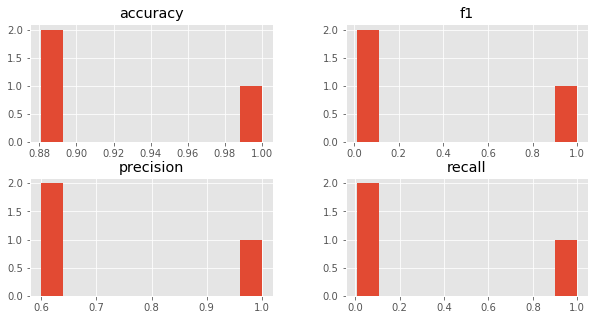

In [594]:
sdf.hist(figsize=(10, 5));

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

In [595]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     predict_proba
model = LogisticRegression()                     # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель

predict_proba = model.predict_proba(X_test)

predict_proba[:,1]
## Your Code Here

array([0.04200223, 0.06958649, 0.13212392, ..., 0.13456771, 0.13865848,
       0.15831316])

(-0.01, 1.01)

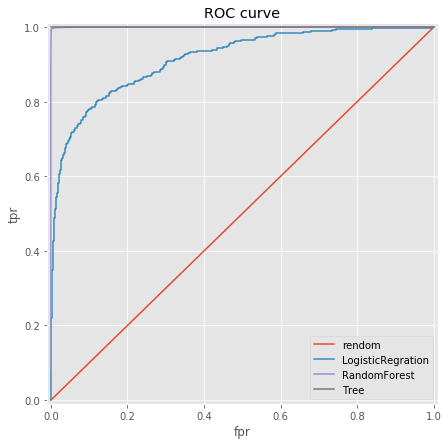

In [596]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])

plt.figure(figsize=(7, 7))
# линия рандома
plt.plot([0, 1], [0, 1])

# линия логистической регрессии
plt.plot(fpr, tpr)

# линия случайного леса
fpr2, tpr2, thresholds2 = roc_curve(y_test, rpredict_proba[:,1])
plt.plot(fpr2, tpr2)

# линия дерева
fpr3, tpr3, thresholds3 = roc_curve(y_test, tpredict_proba[:,1])
plt.plot(fpr3, tpr3)

plt.legend(['rendom', 'LogisticRegration', 'RandomForest', 'Tree'])

plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


In [ ]:
sdf.drop("djfsdfl")

In [597]:
roc_auc_score(y_test, predict_proba[:,1])

0.915667661872963

In [608]:
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [607]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
#rfc = RandomForestClassifier()

cross_val_score(
    lmodel,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.76847433, 0.76361246, 0.6361395 , 0.62708445, 0.65248142,
       0.60210587, 0.67280298, 0.79155958, 0.7917769 , 0.61713865])

In [610]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

scores = cross_val_score(rmodel, df_train_preproc, y, scoring='roc_auc', cv = 10)
itog_val['RandomForestClassifier'] = scores.mean()

scores = cross_val_score(lmodel, df_train_preproc, y, scoring='roc_auc', cv = 10)
itog_val['LogisticRegression'] = scores.mean()

scores = cross_val_score(tree, df_train_preproc, y, scoring='roc_auc', cv = 10)
itog_val['DecisionTreeClassifier'] = scores.mean()


## Your Code Here

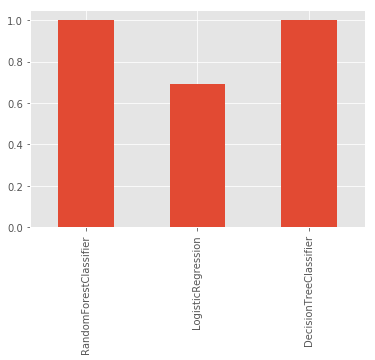

In [612]:
df_train_preproc.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

In [615]:
#Померить roc_auc на тесте
#Вывести текстом и на графике =)
  сделал выше
#Your Code Here

IndentationError: unexpected indent (<ipython-input-615-7d43fbd7ed10>, line 3)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)